## Experiment 2: classificator test

Some usefull packages:

In [2]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.preprocessing import StandardScaler
from textblob import TextBlob
import operator
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Lambda function to flatten the list of coordinates:

In [3]:
flatten = lambda l: [item for sublist in l for item in sublist]

Let's load our data:

In [13]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
texts = pd.read_csv('data/texts.csv')

Let's lemmatize our texts in order to put them into Persistent class

In [14]:
texts.TEXT = texts.TEXT.str.replace('[^\w\s]','')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

texts['TEXT_L'] = texts.TEXT.apply(lemmatize_text)

Let's check the results:

In [5]:
texts.head(10)

,ID,TEXT,TEXT_L
0,0,Let me know how to contact you Ive you settled...,"[Let, me, know, how, to, contact, you, Ive, yo..."
1,1,Where can download clear movies Dvd copies,"[Where, can, download, clear, movie, Dvd, copy]"
2,2,Desires u going to doctor 4 liver And get a bi...,"[Desires, u, going, to, doctor, 4, liver, And,..."
3,3,Do you like Italian food,"[Do, you, like, Italian, food]"
4,4,HouseMaid is the murderer coz the man was murd...,"[HouseMaid, is, the, murderer, coz, the, man, ..."
5,5,True Its easier with her here,"[True, Its, easier, with, her, here]"
6,6,I am not sure about night menu I know only a...,"[I, am, not, sure, about, night, menu, I, know..."
7,7,You have 1 new voicemail Please call 08719181511,"[You, have, 1, new, voicemail, Please, call, 0..."
8,8,Doing nothing then u not having dinner w us,"[Doing, nothing, then, u, not, having, dinner,..."
9,9,Eerie Nokia tones 4u rply TONE TITLE to 8007 e...,"[Eerie, Nokia, tone, 4u, rply, TONE, TITLE, to..."


### 1. Persistent homology attempt:

Usefull packages:

In [4]:
from persistent.persistent import Persistent
import numpy as np

In [115]:
texts_l = texts.TEXT_L

Let's make persistent diagramm for each text word2vec implementation and use it as features:

In [94]:
texts_ph = []

for element in texts_l:
    
    if element:
        a = Persistent(split_sent=element, min_count=1, window=4)
        dgms = a.persistent()
        texts_ph.append(flatten([[p.birth for p in dgms[1]], [p.death for p in dgms[1]]]))
    else:
        texts_ph.append([])

Then transform our data to dataframe:

In [95]:
text_ph_df = pd.DataFrame(texts_ph)
text_ph_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387
0,-0.002109,-0.002048,-0.001875,-0.001544,-0.001314,-0.001178,-0.001146,-0.001000,-0.000892,-0.000814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.002137,-0.002113,-0.001775,-0.001771,-0.001542,-0.001315,-0.001171,-0.001166,-0.001089,-0.000905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.003629,-0.002137,-0.002091,-0.002028,-0.001915,-0.001907,-0.001602,-0.001540,-0.001417,-0.001311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.002281,-0.001969,-0.001170,-0.000884,-0.000814,-0.000764,-0.000640,-0.000607,-0.000586,-0.000458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.002028,-0.001834,-0.001586,-0.001557,-0.001506,-0.001479,-0.001313,-0.001207,-0.001158,-0.001000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.002225,-0.001918,-0.001521,-0.000929,-0.000701,-0.000658,-0.000406,-0.000131,-0.000085,-0.000064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.002491,-0.002209,-0.001934,-0.001780,-0.001772,-0.001401,-0.000891,-0.000827,-0.000811,-0.000687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.001935,-0.001711,-0.001487,-0.001410,-0.001314,-0.001287,-0.001166,-0.000994,-0.000855,-0.000839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-0.002272,-0.002042,-0.001933,-0.001766,-0.001141,-0.001094,-0.000967,-0.000837,-0.000698,-0.000683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-0.002305,-0.002122,-0.001838,-0.001774,-0.001606,-0.001450,-0.001413,-0.001364,-0.001341,-0.001319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


And fill NaN's with 0 and make train and test set's:

In [96]:
text_ph_df['ID'] = texts['ID']

X_train = pd.merge(train, text_ph_df.fillna(0), on='ID', how='left').drop(['ID', 'CATEGORY'], 1).values
y_train = pd.factorize(train['CATEGORY'])[0]

In [97]:
X_train

array([[-0.00210912, -0.00204783, -0.00187465, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00213722, -0.00211261, -0.00177546, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00362868, -0.00213722, -0.00209104, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [-0.00297088, -0.00213617, -0.00203822, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00210824, -0.00204727, -0.00200306, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00211262, -0.00211261, -0.00172371, ...,  0.        ,
         0.        ,  0.        ]])

In [98]:
np.any(np.isnan(X_train))

False

In [99]:
# X_train[X_train == np.inf] = 0
np.all(np.isfinite(X_train))

True

#### 1.1 PH representation test:

Let's load some models which are often used in classification tasks:

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

And implement them with basic parametres:

In [43]:
svc = SVC()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()

In [44]:
clfs = {'SVC' : svc,'KN' : knc, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

This is the function to test our models:

In [41]:
def cv_res(clf, X, y):
    return np.mean(cross_val_score(clf, X, y, cv=10, scoring='roc_auc', n_jobs=1))

In [104]:
pred_scores_ph = []
for k,v in clfs.items():
    pred = cv_res(v, X_train, y_train)
    print((k, pred))
    pred_scores_ph.append((k, pred))

('DT', 0.8465521588472027)
('KN', 0.91428109687714476)
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]('LR', 0.94695210599483093)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

('ETC', 0.93196769561834003)
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]('SVC', 0.94055576903461446)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

('RF', 0.93354613847686552)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]

('BgC', 0.92958828889534106)
('AdaBoost', 0.93259214143148539)


Let's see the plot:

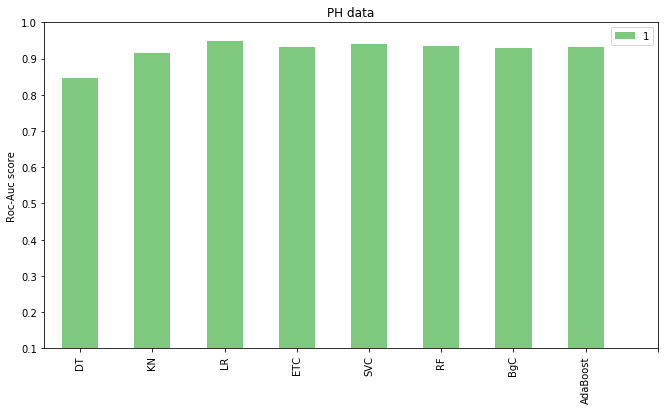

In [108]:
pd.DataFrame(pred_scores_ph).plot(kind='bar', ylim=(0.1,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9),pd.DataFrame(pred_scores_ph)[0])
plt.ylabel('Roc-Auc score')
plt.title('PH data')

plt.show()

Let's compute the average score:

In [112]:
scores = []

for el in pred_scores_ph:
    scores.append(el[1])

print(np.mean(scores))
print(np.max(scores))

0.922004424397
0.946952105995


In [113]:
max(pred_scores_ph)

('SVC', 0.94055576903461446)

Average is 0.928820128686, best model is Linear Regression with 0.945664318571 score

### 2. Tf-idf attempt:

In [26]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 2),
    max_features=10000)

text_tfidf = word_vectorizer.fit_transform(texts.TEXT).toarray()

text_tfidf = pd.DataFrame(text_tfidf)

text_tfidf['ID'] = texts['ID']

In [56]:
X_train_ti = pd.merge(train, text_tfidf, on='ID', how='left').drop(['ID', 'CATEGORY'], 1).values
y_train_ti = pd.factorize(train['CATEGORY'])[0]

In [58]:
X_train_ti.shape

(3825, 10000)

In [34]:
pred_scores = []
for k,v in clfs.items():
    pred = cv_res(v, X_train_ti, y_train_ti)
    print((k, pred))
    pred_scores.append((k, pred))

('ETC', 0.9730094729919424)
('AdaBoost', 0.94760455626051476)
('BgC', 0.96296286586115054)
('KN', 0.81963648864078364)
('DT', 0.9079393535993221)
('SVC', 0.97529289892127413)
('RF', 0.97658532331903503)
('LR', 0.98355075588543495)


In [36]:
scores = []

for el in pred_scores:
    scores.append(el[1])

print(np.mean(scores))
print(np.max(scores))

0.943322714435
0.983550755885


In [71]:
a[2] = b[1]
a = a.rename(columns={1: 'Tf-idf', 2: 'PH'})
a

,0,Tf-idf,PH
0,ETC,0.973009,0.941332
1,AdaBoost,0.947605,0.944081
2,BgC,0.962963,0.931204
3,KN,0.819636,0.919876
4,DT,0.907939,0.862231
5,SVC,0.975293,0.939685
6,RF,0.976585,0.941808
7,LR,0.983551,0.945664


Comparison of perfomance on spam-sms dataset.

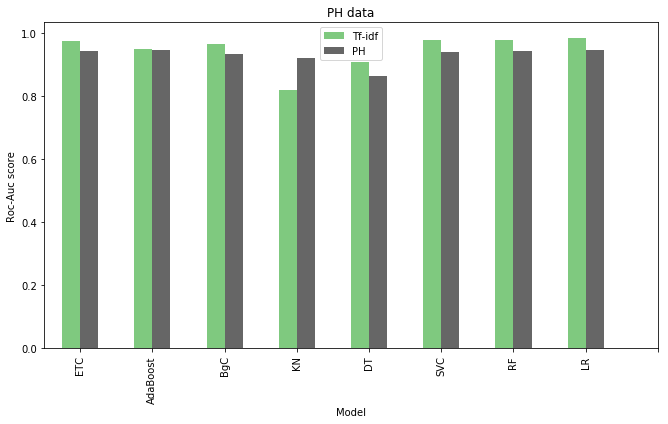

In [72]:
a.plot(x=0, y=['Tf-idf', 'PH'], kind="bar", figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9),pd.DataFrame(pred_scores)[0])
plt.ylabel('Roc-Auc score')
plt.xlabel('Model')
plt.title('PH data')
plt.show()


### 3. Bag of words attempt:

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)

# text_bow = bigram_vectorizer.fit_transform(texts.TEXT).toarray()

# text_bow = pd.DataFrame(text_bow)

# text_bow['ID'] = texts['ID']

In [20]:
X_train_bow = pd.merge(train, text_bow, on='ID', how='left').drop(['ID', 'CATEGORY'], 1).values
y_train_bow = pd.factorize(train['CATEGORY'])[0]

Size of bow dataset:

In [54]:
X_train_bow.shape

(3825, 56309)

In [37]:
pred_scores_bow = []
for k,v in clfs.items():
    pred = cv_res(v, X_train_bow, y_train_bow)
    print((k, pred))
    pred_scores_bow.append((k, pred))

('DT', 0.90851949055113845)
('KN', 0.8326076762721808)
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]('LR', 0.98443192439763028)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   22.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.6s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   22.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   19.8s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   22.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   20.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

('ETC', 0.97518123980811411)
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]('SVC', 0.96041436937546809)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

('RF', 0.96976590651599825)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]

('BgC', 0.96025577313028221)
('AdaBoost', 0.96373613179597106)


In [38]:
pred_scores_bow

[('DT', 0.90851949055113845),
 ('KN', 0.8326076762721808),
 ('LR', 0.98443192439763028),
 ('ETC', 0.97518123980811411),
 ('SVC', 0.96041436937546809),
 ('RF', 0.96976590651599825),
 ('BgC', 0.96025577313028221),
 ('AdaBoost', 0.96373613179597106)]

In [39]:
pred_scores_tdidf = [('ETC', 0.9730094729919424),
('AdaBoost', 0.94760455626051476),
('BgC', 0.96296286586115054),
('KN', 0.81963648864078364),
('DT', 0.9079393535993221),
('SVC', 0.97529289892127413),
('RF', 0.97658532331903503),
('LR', 0.98355075588543495)]

In [40]:
pred_scores_persist = [('ETC', 0.94133249802586216),
('AdaBoost', 0.94408050830103107),
('BgC', 0.93120357971773282),
('KN', 0.91987607214531319),
('DT', 0.86223097399407655),
('SVC', 0.93968547882396436),
('RF', 0.94180839763139979),
('LR', 0.94566431857093036)]

In [41]:
a = pd.DataFrame(pred_scores_bow)
b = pd.DataFrame(pred_scores_tdidf)
c = pd.DataFrame(pred_scores_persist)

In [42]:
a[2] = b[1]
a[3] = c[1]

In [43]:
a

,0,1,2,3
0,DT,0.908519,0.973009,0.941332
1,KN,0.832608,0.947605,0.944081
2,LR,0.984432,0.962963,0.931204
3,ETC,0.975181,0.819636,0.919876
4,SVC,0.960414,0.907939,0.862231
5,RF,0.969766,0.975293,0.939685
6,BgC,0.960256,0.976585,0.941808
7,AdaBoost,0.963736,0.983551,0.945664


In [44]:
a = a.rename(columns={1: 'BoW', 2: 'Tf-idf', 3: 'w2v + PH'})

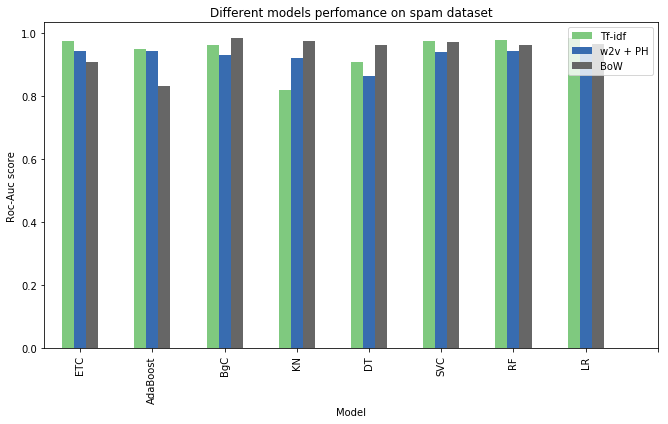

In [59]:
a.plot(x=0, y=['Tf-idf', 'w2v + PH', 'BoW'], kind="bar", figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9),pd.DataFrame(pred_scores_tdidf)[0])
plt.ylabel('Roc-Auc score')
plt.xlabel('Model')
plt.title('Different models perfomance on spam dataset')
plt.show()

In [50]:
max(pred_scores_bow)

('SVC', 0.96041436937546809)

In [53]:
scores = []

for el in pred_scores_bow:
    scores.append(el[1])

print(np.mean(scores))
print(np.max(scores))

0.944364063981
0.984431924398


### 4. Resume:

Size of our w2v + PH dataset is much-much smaller:

* 1390 columns --  w2v + PH
* 10000 columns -- tf-idf
* 56309 columns -- BoW

Perfomance is comparable to two of it's main competitors: 

* BoW mean: 0.944364063981, max: 0.96041436937546809 (Support Vector Machines)
* Tf-idf mean: 0.943322714435, max: 0.983550755885 (Linear regression)
* w2v + PH mean: 0.928820128686, max: 0.945664318571 (Linear regression)

As we can see even with reaaly simple idea of using x and y coordinates and features it can perform comparably to a BoW and tf-idf trained models. It is also really stable. 

Need to work on w2v model settings and think of different PH attributes that we can get. 


### 6. Sentiment analysis attempt:

#### Persistent homology

In [9]:
data_twit = pd.read_csv('data/Sentiment Analysis Dataset.csv', encoding = "ISO-8859-1")

In [10]:
data_twit.head(10)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


In [16]:
data_twit.TEXT = data_twit.SentimentText.str.replace('[^\w\s]','')

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

data_twit['TEXT_L'] = data_twit.SentimentText.apply(lemmatize_text)

In [17]:
data_twit.head(10)

,ItemID,Sentiment,SentimentText,TEXT_L
0,1,0,is so sad for my APL frie...,"[is, so, sad, for, my, APL, friend.............]"
1,2,0,I missed the New Moon trail...,"[I, missed, the, New, Moon, trailer...]"
2,3,1,omg its already 7:30 :O,"[omg, it, already, 7:30, :O]"
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,"[.., Omgaga., Im, sooo, im, gunna, CRy., I've,..."
4,5,0,i think mi bf is cheating on me!!! ...,"[i, think, mi, bf, is, cheating, on, me!!!, T_T]"
5,6,0,or i just worry too much?,"[or, i, just, worry, too, much?]"
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,"[Juuuuuuuuuuuuuuuuussssst, Chillin!!]"
7,8,0,Sunny Again Work Tomorrow :-| ...,"[Sunny, Again, Work, Tomorrow, :-|, TV, Tonight]"
8,9,1,handed in my uniform today . i miss you ...,"[handed, in, my, uniform, today, ., i, miss, y..."
9,10,1,hmmmm.... i wonder how she my number @-),"[hmmmm...., i, wonder, how, she, my, number, @-)]"


In [18]:
data_twit = data_twit[0:5000]

In [19]:
data_twit.shape

(5000, 4)

In [21]:
texts_ph_twit = []

for element in data_twit.TEXT_L:
    
    if element:
        a = Persistent(split_sent=element, min_count=1, window=4, workers=-1)
        dgms = a.persistent()
        texts_ph_twit.append(flatten([[p.birth for p in dgms[1]], [p.death for p in dgms[1]]]))
    else:
        texts_ph_twit.append([])
        

In [22]:
text_ph_twit_df = pd.DataFrame(texts_ph_twit)

X_train_twit = text_ph_twit_df.fillna(0).values
y_train_twit = data_twit.Sentiment[0:5000]

In [23]:
pred_scores_ph_tw = []
for k,v in clfs.items():
    pred = cv_res(v, X_train_twit, y_train_twit)
    print((k, pred))
    pred_scores_ph_tw.append((k, pred))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]('LR', 0.55336733761950063)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

('ETC', 0.55040687249546616)
('AdaBoost', 0.53130466015343858)
('KN', 0.52407477274642733)
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]('SVC', 0.55426599877581384)


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   15.1s remaining:   15.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   21.2s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   17.3s remaining:   17.3s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   20.3s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   13.3s remaining:   13.3s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   17.2s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   18.7s remaining:   18.7s
[Parallel(n_jobs=4)]

('BgC', 0.54859886887080811)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

('RF', 0.52961781965415988)
('DT', 0.51761476782906757)


In [24]:
printnt(pred_scores_ph_tw)

[('LR', 0.55336733761950063), ('ETC', 0.55040687249546616), ('AdaBoost', 0.53130466015343858), ('KN', 0.52407477274642733), ('SVC', 0.55426599877581384), ('BgC', 0.54859886887080811), ('RF', 0.52961781965415988), ('DT', 0.51761476782906757)]


#### Tf-idf:

In [27]:
text_tfidf_tw = word_vectorizer.fit_transform(data_twit.SentimentText).toarray()

text_tfidf_tw = pd.DataFrame(text_tfidf_tw)

X_train_twit_tf = text_tfidf_tw.values

In [28]:
pred_scores_tf_tw = []
for k,v in clfs.items():
    pred = cv_res(v, X_train_twit_tf, y_train_twit)
    print((k, pred))
    pred_scores_tf_tw.append((k, pred))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]('LR', 0.80254376131947736)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.8s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.8s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.4s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.1s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.6s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.5s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

('ETC', 0.73519273617727721)
('AdaBoost', 0.72505889955731628)
('KN', 0.55363210159835419)
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]('SVC', 0.78298119678291889)


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  1.1min remaining:  1.1min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.4min finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   53.2s remaining:   53.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=4)]

('BgC', 0.71899650198968135)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.1s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.9s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.9s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

('RF', 0.7364563134868447)
('DT', 0.63083184364917821)


In [30]:
print(pred_scores_tf_tw)

[('LR', 0.80254376131947736), ('ETC', 0.73519273617727721), ('AdaBoost', 0.72505889955731628), ('KN', 0.55363210159835419), ('SVC', 0.78298119678291889), ('BgC', 0.71899650198968135), ('RF', 0.7364563134868447), ('DT', 0.63083184364917821)]


#### BoW:

In [36]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)

text_bow_tw = bigram_vectorizer.fit_transform(data_twit.SentimentText).toarray()

text_bow_tw_df = pd.DataFrame(text_bow_tw)

In [37]:
X_train_twit_bow = text_bow_tw_df.values

In [45]:
pred_scores_bow_tw = []
for k,v in clfs.items():
    pred = cv_res(v, X_train_twit_bow, y_train_twit)
    print((k, pred))
    pred_scores_bow_tw.append((k, pred))

('LR', 0.81364894817915201)
('ETC', 0.72522123912920899)
('AdaBoost', 0.73939695190385513)
('KN', 0.6014683526056247)
('SVC', 0.77824802646218694)
('BgC', 0.6984132938640929)
('RF', 0.70967442575726436)
('DT', 0.62617621686466463)


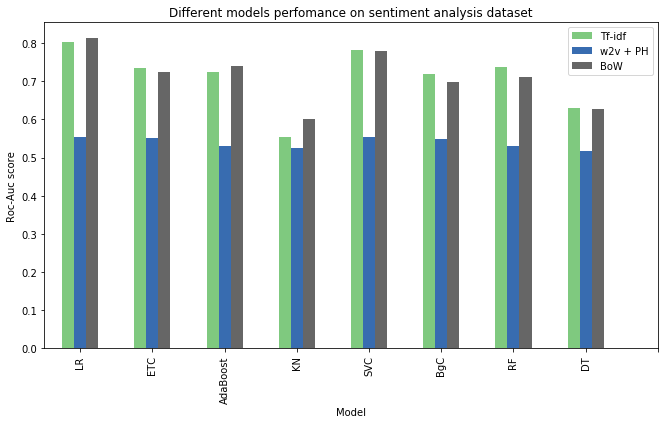

In [48]:
a = pd.DataFrame(pred_scores_bow_tw)
b = pd.DataFrame(pred_scores_tf_tw)
c = pd.DataFrame(pred_scores_ph_tw)

a[2] = b[1]
a[3] = c[1]

a = a.rename(columns={1: 'BoW', 2: 'Tf-idf', 3: 'w2v + PH'})

a.plot(x=0, y=['Tf-idf', 'w2v + PH', 'BoW'], kind="bar", figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9),pd.DataFrame(pred_scores_bow_tw)[0])
plt.ylabel('Roc-Auc score')
plt.xlabel('Model')
plt.title('Different models perfomance on sentiment analysis dataset')
plt.show()

In [57]:
scores = [pred_scores_bow_tw, pred_scores_tf_tw, pred_scores_ph_tw]

for score in scores:
    scores_f = []
    for el in score:
        scores_f.append(el[1])
    print('mean ', np.mean(scores_f))
    print('max ', np.max(scores_f))
    for element in score:
        if element[1] == np.max(scores_f):
            print(element[0])

mean  0.711530931846
max  0.813648948179
LR
mean  0.71071166932
max  0.802543761319
LR
mean  0.538656387268
max  0.554265998776
SVC
